In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier


In [2]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20)

In [12]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

print('축소전:', X_train_sc.shape)
print(X_test_sc.shape)

축소전: (133, 13)
(45, 13)


In [13]:
# kernel: 커널함수(비선형)을 이용하여 비선형 데이터를 고차원에 mapping
k_pca = KernelPCA(n_components=2, kernel='poly')
k_pca.fit(X_train_sc)
X_train_kpca= k_pca.transform(X_train_sc)
X_test_kpca= k_pca.transform(X_test_sc)
print('축소후:', X_train_kpca.shape)
print(X_test_kpca.shape)

축소후: (133, 2)
(45, 2)


In [15]:
# 고유값, 고유 벡터

In [16]:
kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_train_kpca_df = pd.DataFrame(X_train_kpca, columns=kpca_columns)
X_train_kpca_df['target'] = y_train

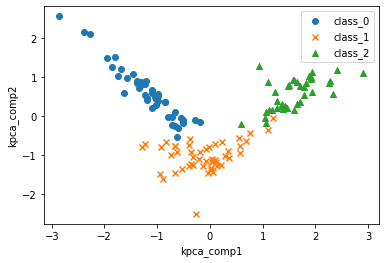

In [18]:
df = X_train_kpca_df
markers = ['o', 'x', '^']
for i, mark in enumerate(markers):
  X_i = df[df['target']==i]
  target_i = wine.target_names[i]
  X1 = X_i['kpca_comp1']
  X2 = X_i['kpca_comp2']
  plt.scatter(X1, X2, marker=mark, label=target_i)

plt.xlabel('kpca_comp1')
plt.ylabel('kpca_comp2')
plt.legend()
plt.show()



In [21]:
rfc_kpca = RandomForestClassifier(max_depth=2,
                                  random_state=20)
rfc_kpca.fit(X_train_kpca, y_train)
y_pred = rfc_kpca.predict(X_test_kpca)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0